In [1]:
#importing the libraries
import cv2
import numpy as np

In [2]:
#importing the original maze image
img = cv2.imread("C:/Users/ARPITA KUMARI/objectdetection/2.png")
cv2.imshow('Maze', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

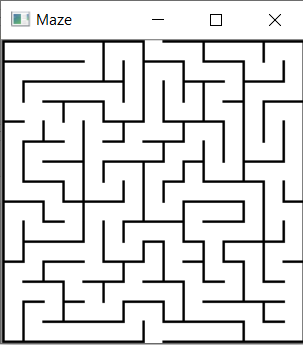

In [3]:
# Binary conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Inverting tholdolding will give us a binary image with a white wall and a black background.
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV) 
cv2.imshow('Threshold 1', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

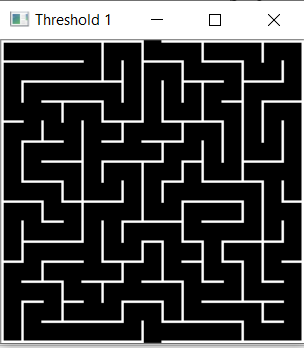

In [4]:
# Contours
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
dc = cv2.drawContours(thresh, contours, 0, (255, 255, 255), 5)
cv2.imshow('Contours 1', dc)
cv2.waitKey(0)
cv2.destroyAllWindows()

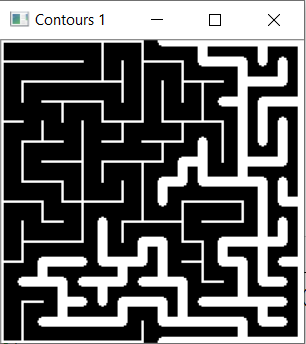

In [5]:
dc = cv2.drawContours(dc, contours, 1, (0,0,0) , 5)
cv2.imshow('Contours 2', dc)
cv2.waitKey(0)
cv2.destroyAllWindows()

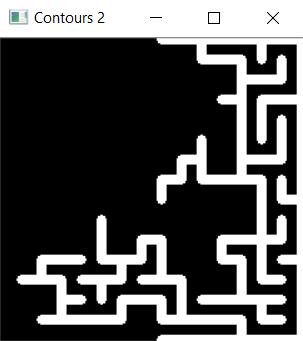

In [6]:
ret, thresh = cv2.threshold(dc, 240, 255, cv2.THRESH_BINARY)
cv2.imshow('Threshold 2', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

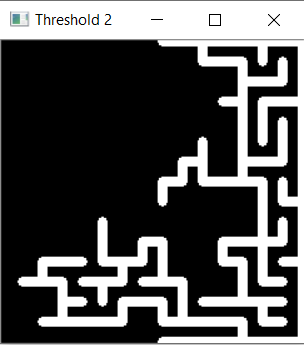

In [7]:
#dilate
ke = 19
kernel = np.ones((ke, ke), np.uint8)
dilation = cv2.dilate(thresh, kernel, iterations=1)
cv2.imshow('Dilation', dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()

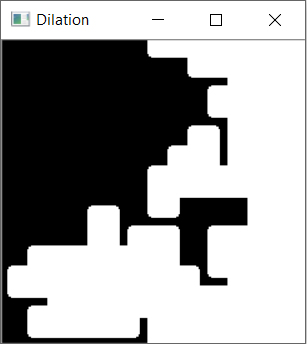

In [8]:
#erosion
erosion = cv2.erode(dilation, kernel, iterations=1)
cv2.imshow('Erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

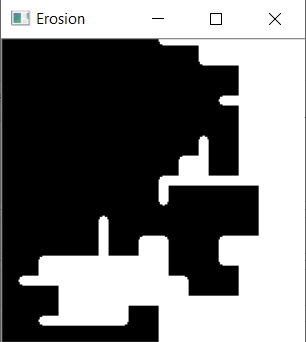

In [9]:
# Find differences between two images(dilated image and eroded image)
diff = cv2.absdiff(dilation, erosion)
cv2.imshow('Difference', diff)
cv2.waitKey(0)
cv2.destroyAllWindows()

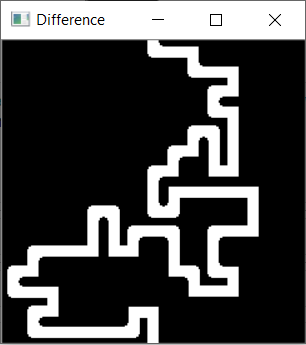

In [10]:
# splitting the channels of maze
b, g, r = cv2.split(img)
mask_inv = cv2.bitwise_not(diff)
cv2.imshow('Mask', mask_inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

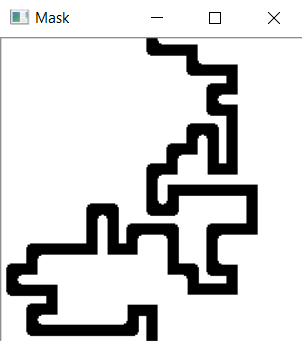

In [11]:
# masking out the green and red colour from the solved path
r = cv2.bitwise_and(r, r, mask=mask_inv)
b = cv2.bitwise_and(b, b, mask=mask_inv)
#finally solved maze
res = cv2.merge((b, g, r))
cv2.imshow('Solved Maze', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

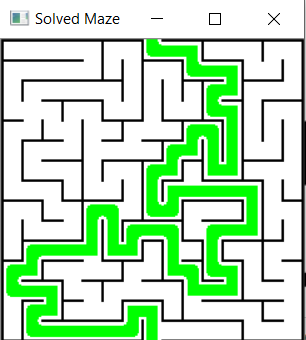